<a href="https://colab.research.google.com/github/snehacd/CodeClauseEmployeeAttrition/blob/main/EmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Specify the folder name
folder_name = 'EmployeeAttrition'

# Check if the folder doesn't exist already
if not os.path.exists(folder_name):
    # Create the folder
    os.makedirs(folder_name)
    print(f'Folder "{folder_name}" created successfully.')
else:
    print(f'Folder "{folder_name}" already exists.')


Folder "EmployeeAttrition" created successfully.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
employee_data = pd.read_csv("EmployeeAttrition/attrition.csv")

In [ ]:
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
##looking for any missing values

employee_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
## basic descriptive statistics
employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
## basic descriptive statistics
employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Mapping the attrition 1 - yes and 0 - no in the new column

employee_data["left"] = np.where(employee_data["Attrition"] == "Yes",1,0)

In [ ]:
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [ ]:
#supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""

    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)

    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)

    plt.show()

In [ ]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):

    """A function for Plotting the effect of variables(categorical data) on attrition """

    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))

    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])

    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")

    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)

    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

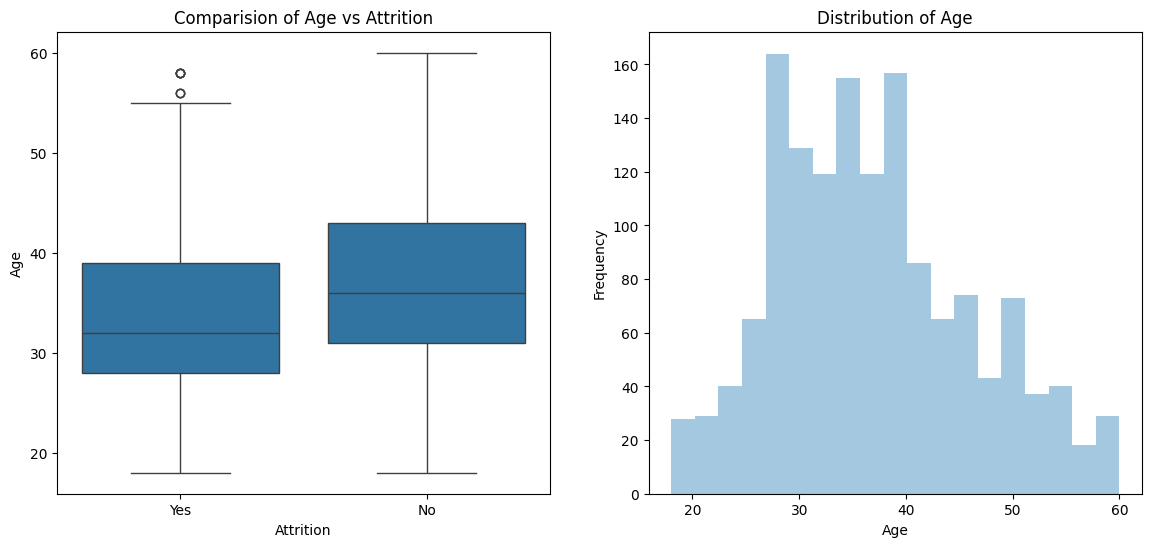

In [ ]:
NumericalVariables_targetPlots(employee_data,segment_by="Age")

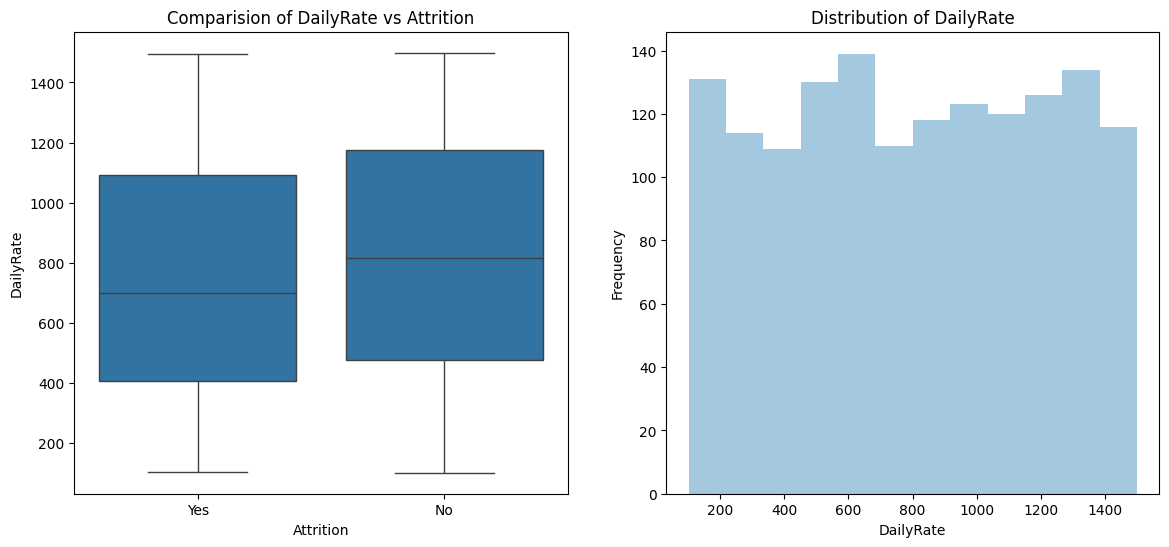

In [ ]:
#Analyzing the daily wage rate vs employee left the company or not

NumericalVariables_targetPlots(employee_data,"DailyRate")

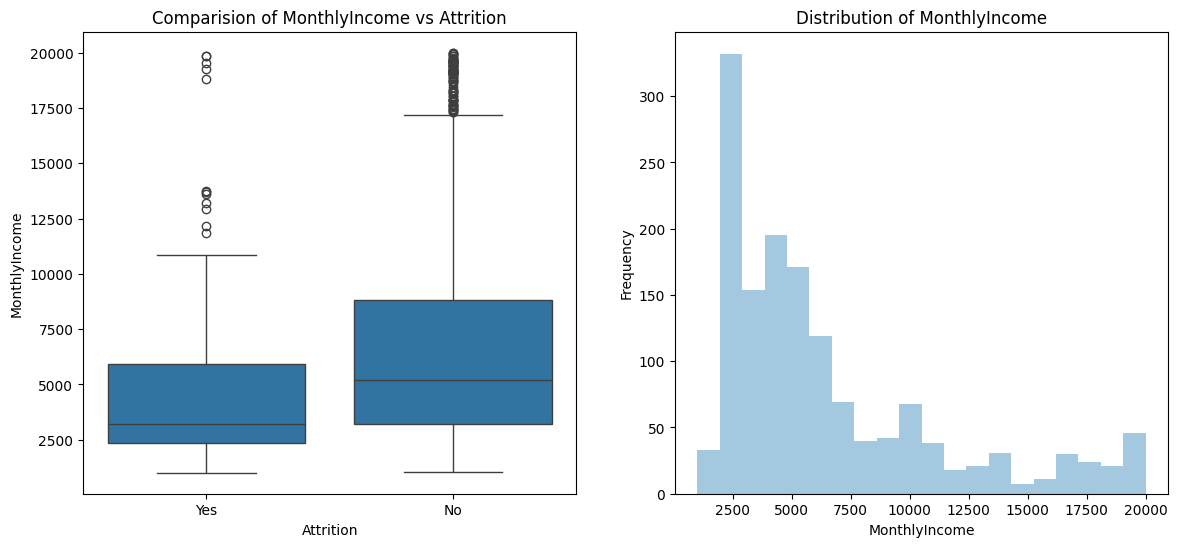

In [ ]:
NumericalVariables_targetPlots(employee_data,"MonthlyIncome")

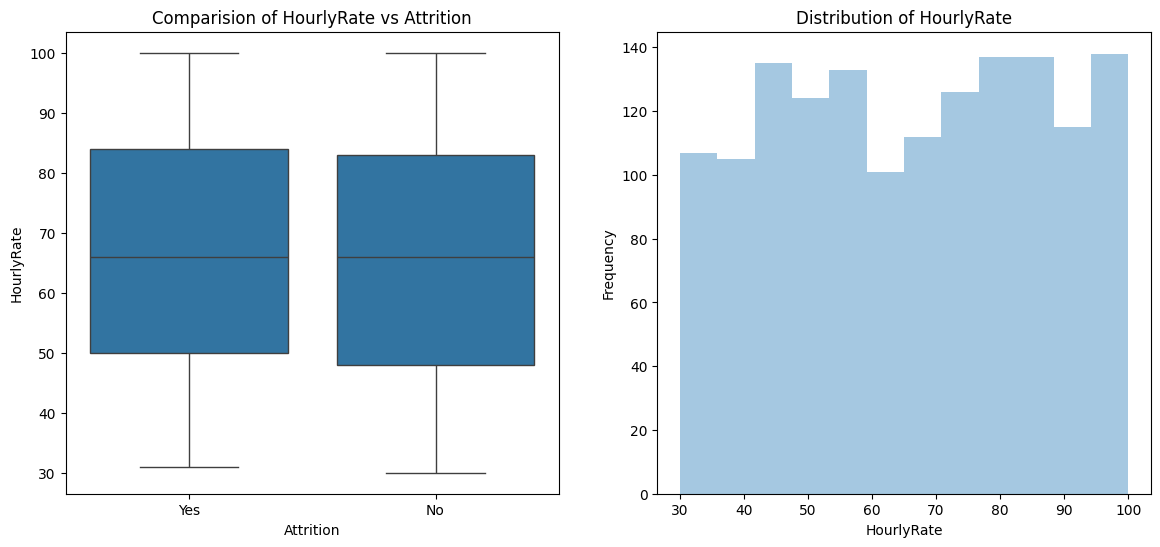

In [ ]:
NumericalVariables_targetPlots(employee_data,"HourlyRate")

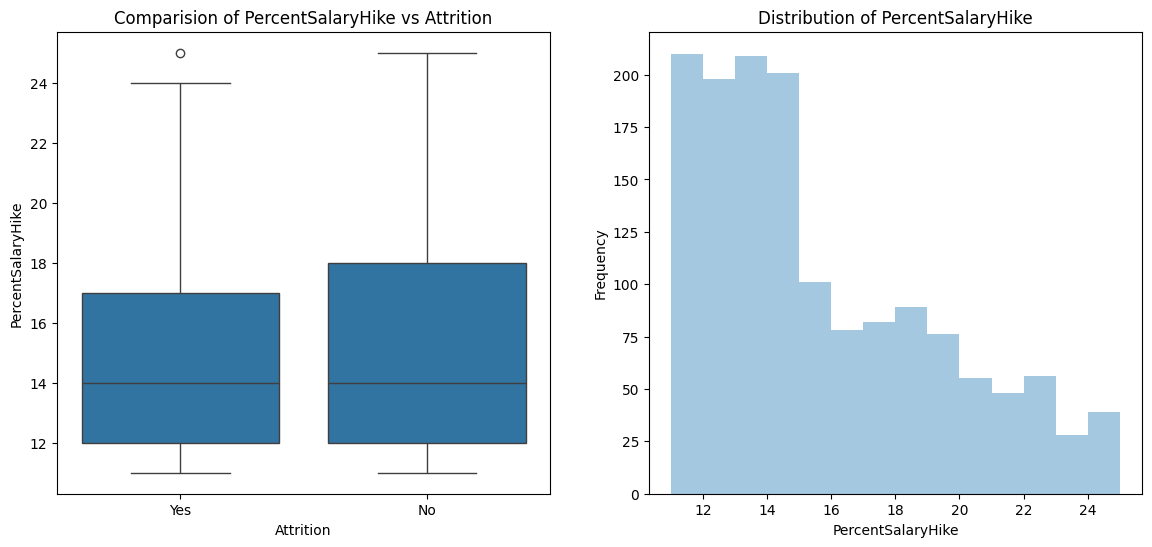

In [ ]:
NumericalVariables_targetPlots(employee_data,"PercentSalaryHike")

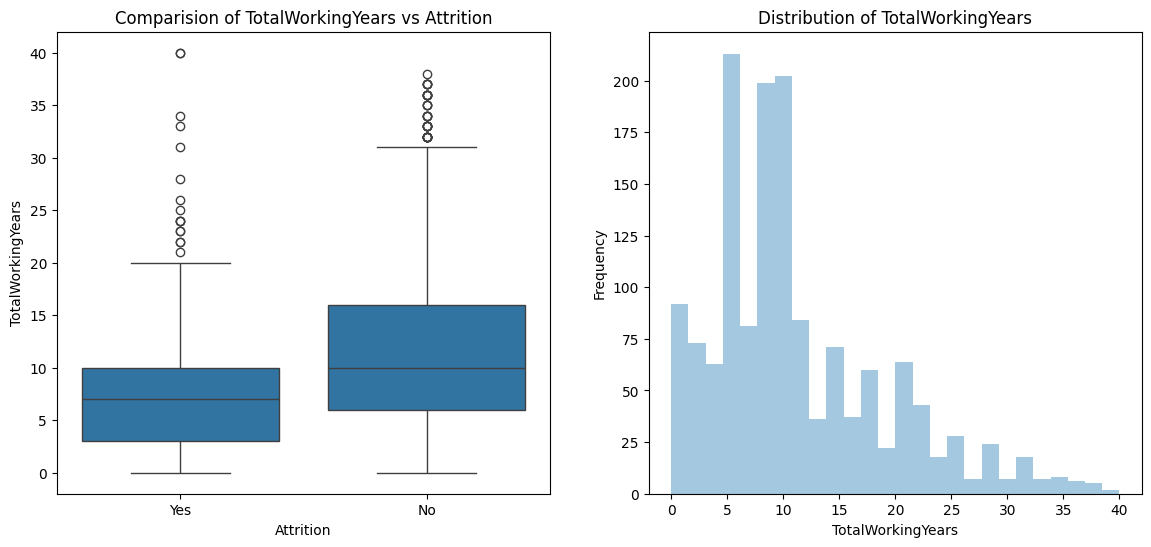

In [ ]:
NumericalVariables_targetPlots(employee_data,"TotalWorkingYears")

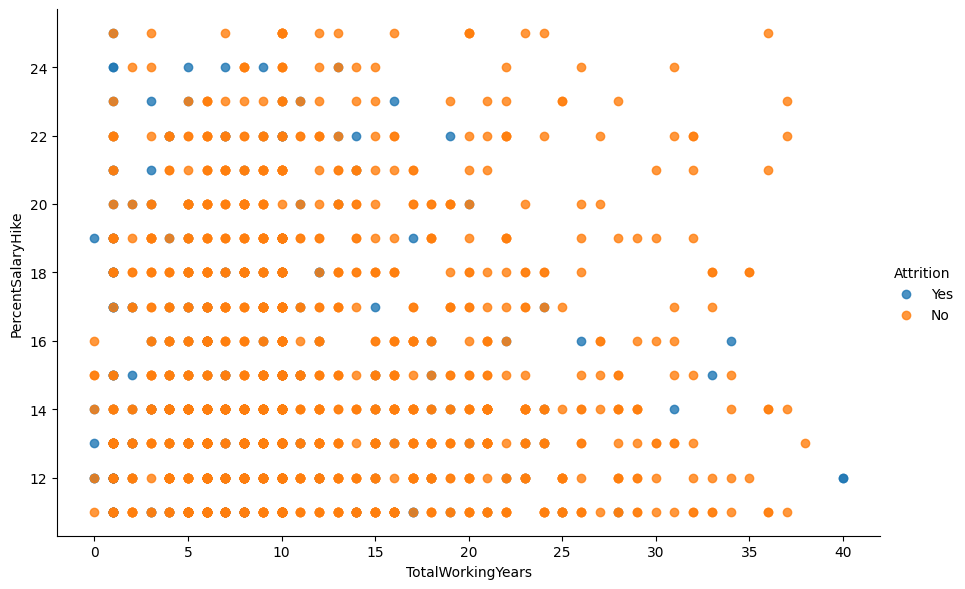

In [ ]:
sns.lmplot(x = "TotalWorkingYears", y = "PercentSalaryHike", data=employee_data,fit_reg=False,hue="Attrition",height=6,
           aspect=1.5)

plt.show()

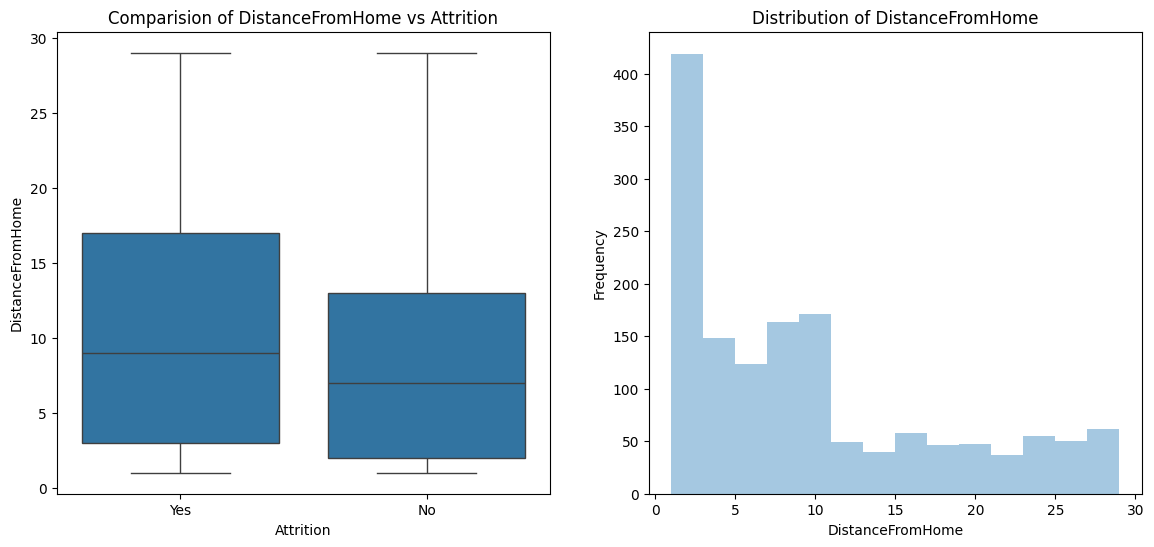

In [ ]:
NumericalVariables_targetPlots(employee_data,"DistanceFromHome")

In [ ]:
round(employee_data.JobInvolvement.value_counts()/employee_data.shape[0] * 100,2)

3    59.05
2    25.51
4     9.80
1     5.65
Name: JobInvolvement, dtype: float64

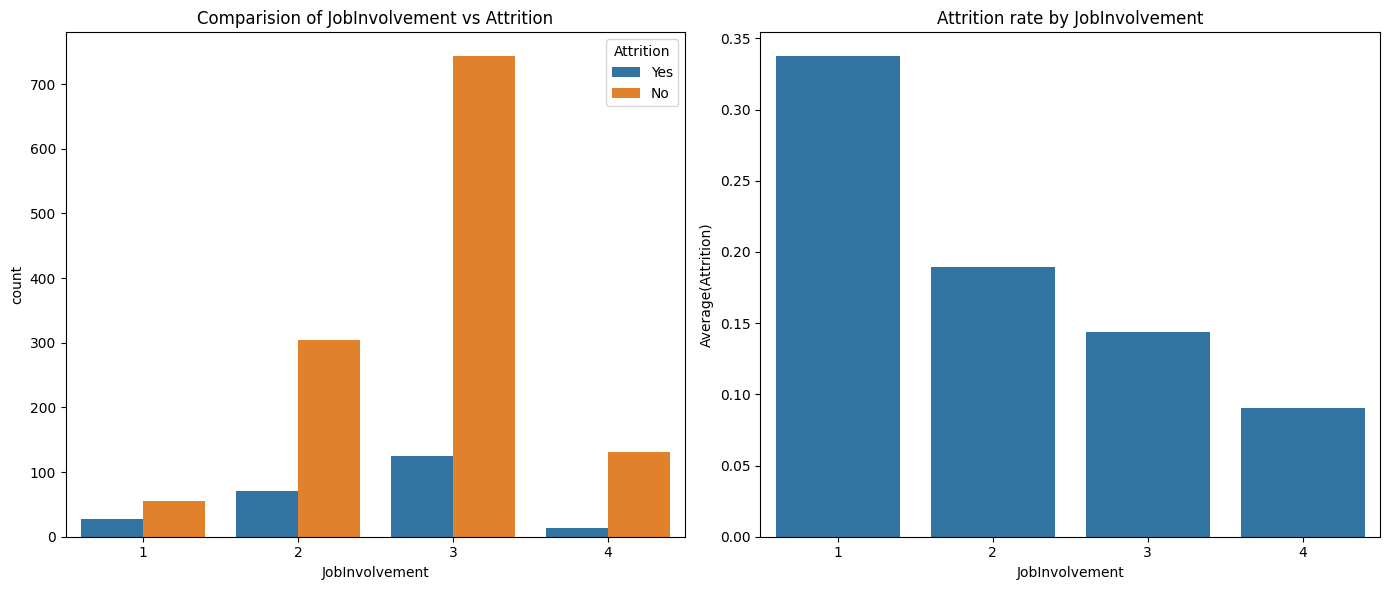

In [ ]:
CategoricalVariables_targetPlots(employee_data,"JobInvolvement")

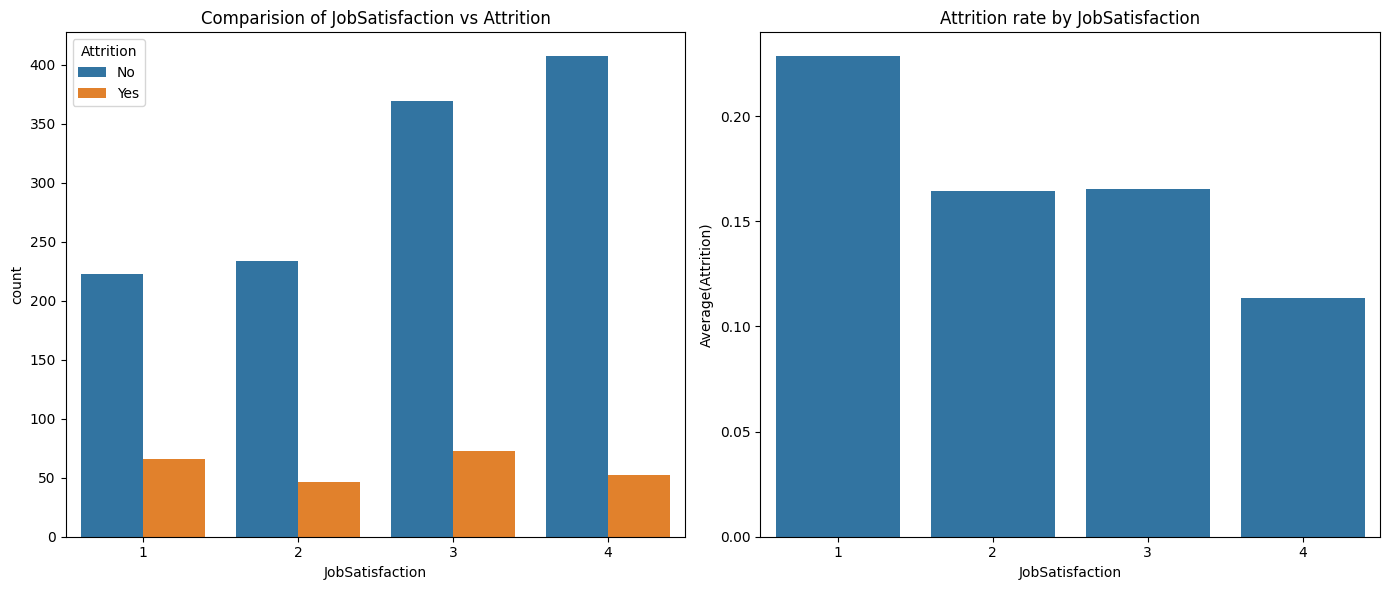

In [ ]:
CategoricalVariables_targetPlots(employee_data,"JobSatisfaction")

In [ ]:
#checking the number of categories under performance rating
employee_data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [ ]:
#calculate the percentage of performance rating per category in the whole dataset
round(employee_data.PerformanceRating.value_counts()/employee_data.shape[0] * 100,2)

3    84.63
4    15.37
Name: PerformanceRating, dtype: float64

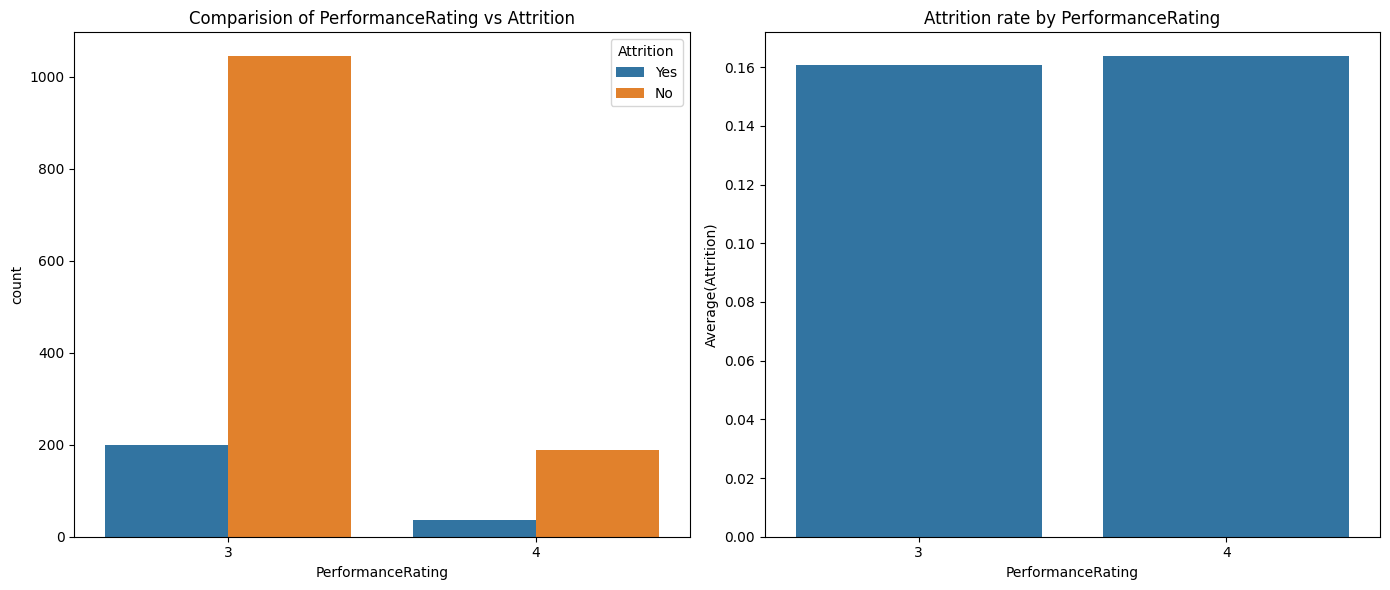

In [ ]:
CategoricalVariables_targetPlots(employee_data,"PerformanceRating")

In [ ]:
#percentage of each relationship satisfaction category across the data
round(employee_data.RelationshipSatisfaction.value_counts()/employee_data.shape[0],2)

3    0.31
4    0.29
2    0.21
1    0.19
Name: RelationshipSatisfaction, dtype: float64

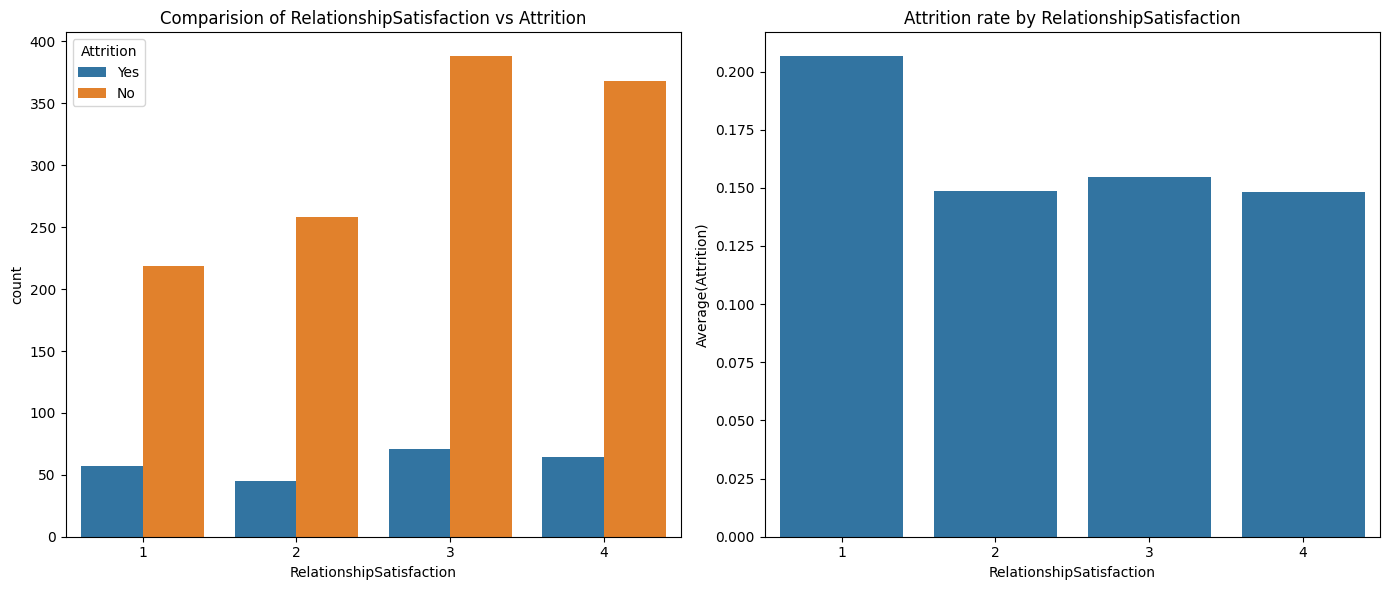

In [ ]:
CategoricalVariables_targetPlots(employee_data,"RelationshipSatisfaction")

In [ ]:
#percentage of worklife balance rating across the company data
round(employee_data.WorkLifeBalance.value_counts()/employee_data.shape[0],2)

3    0.61
2    0.23
4    0.10
1    0.05
Name: WorkLifeBalance, dtype: float64

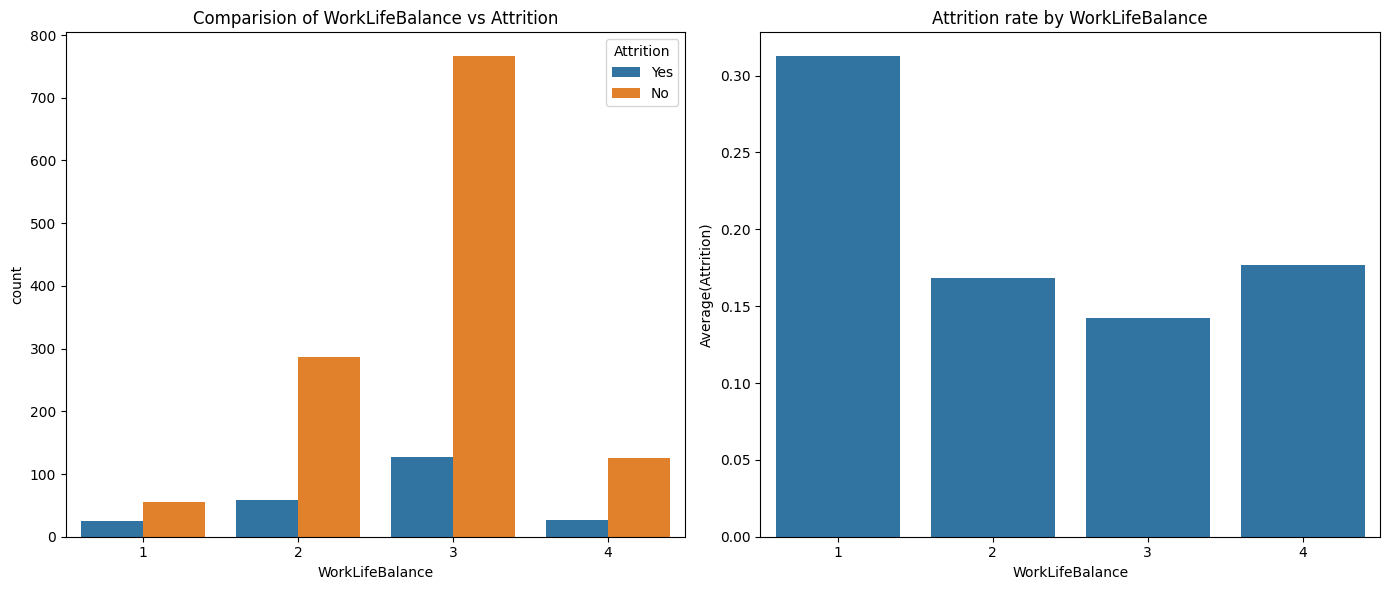

In [ ]:
CategoricalVariables_targetPlots(employee_data,"WorkLifeBalance")

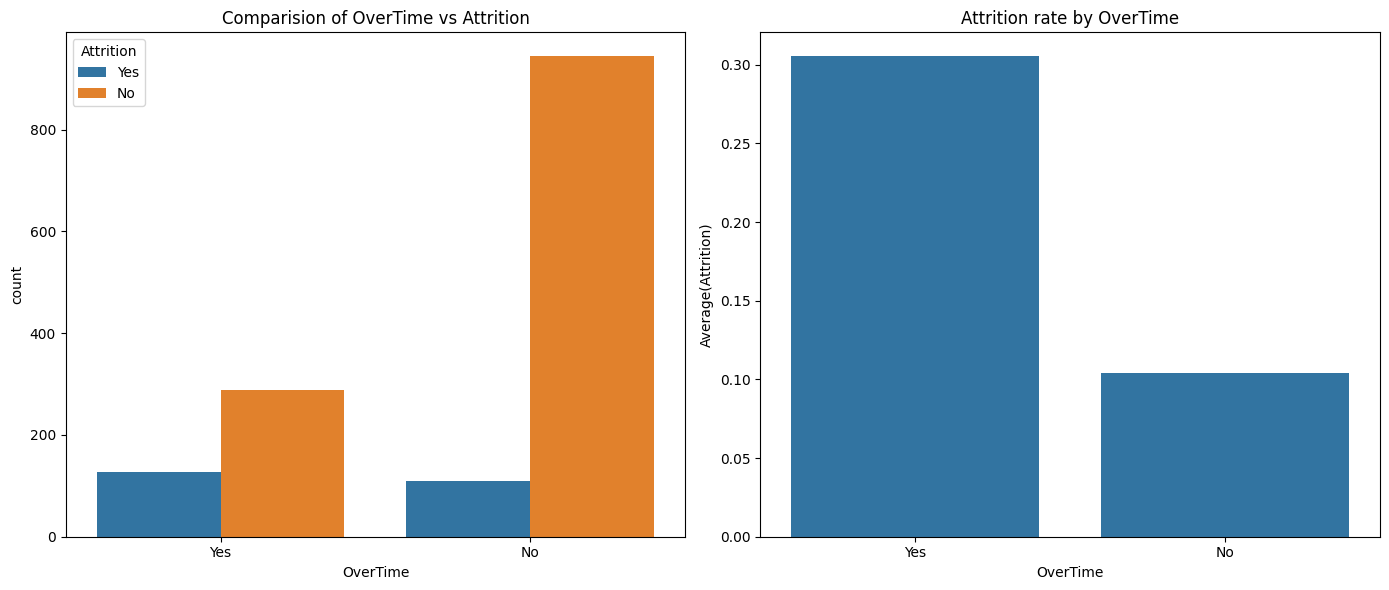

In [ ]:
CategoricalVariables_targetPlots(employee_data,"OverTime")

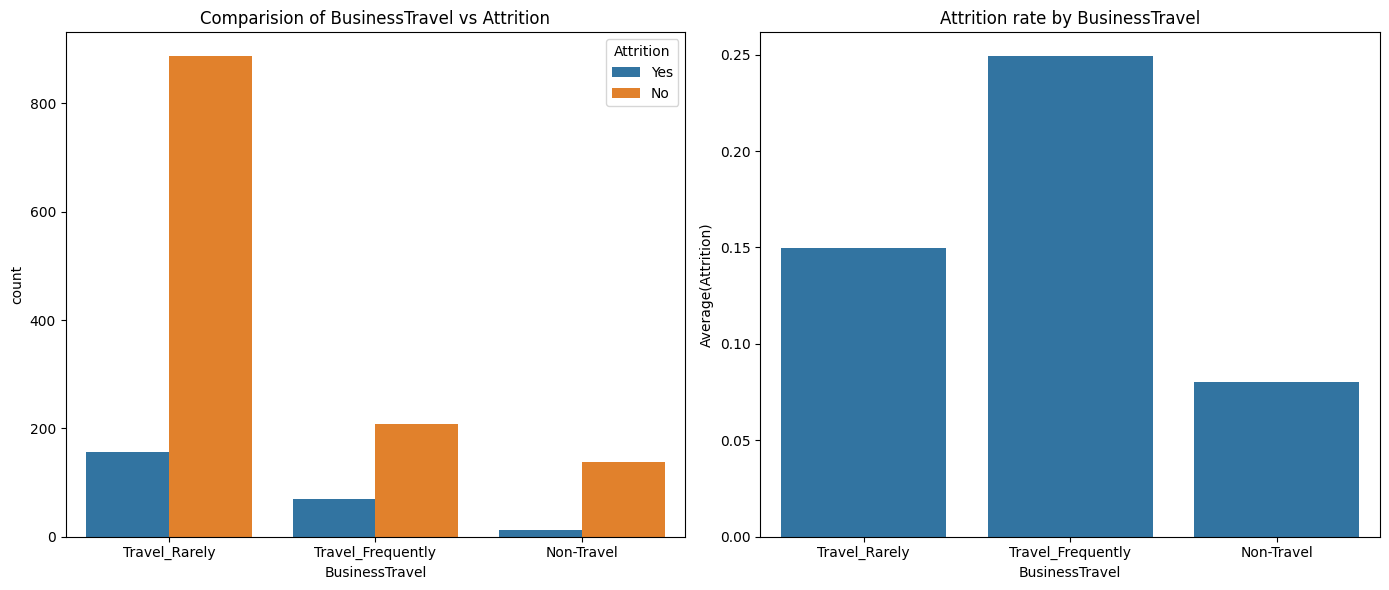

In [ ]:
CategoricalVariables_targetPlots(employee_data,segment_by="BusinessTravel")

In [ ]:
employee_data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

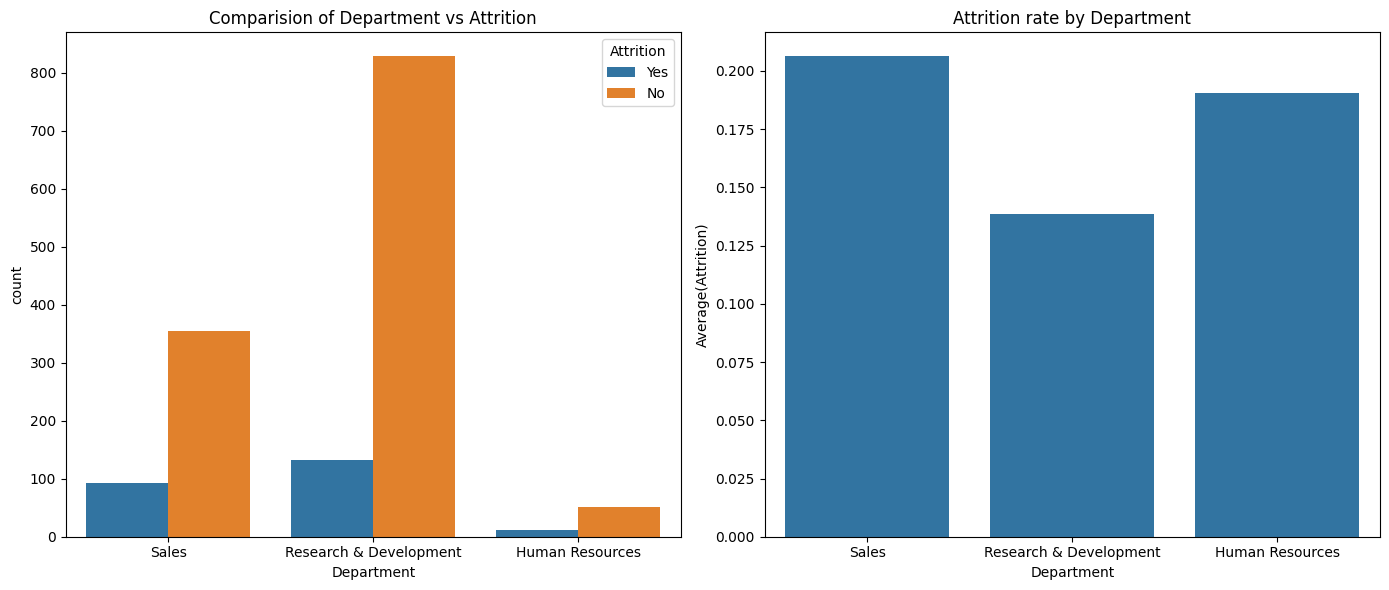

In [ ]:
CategoricalVariables_targetPlots(employee_data,segment_by="Department")

In [ ]:
employee_data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

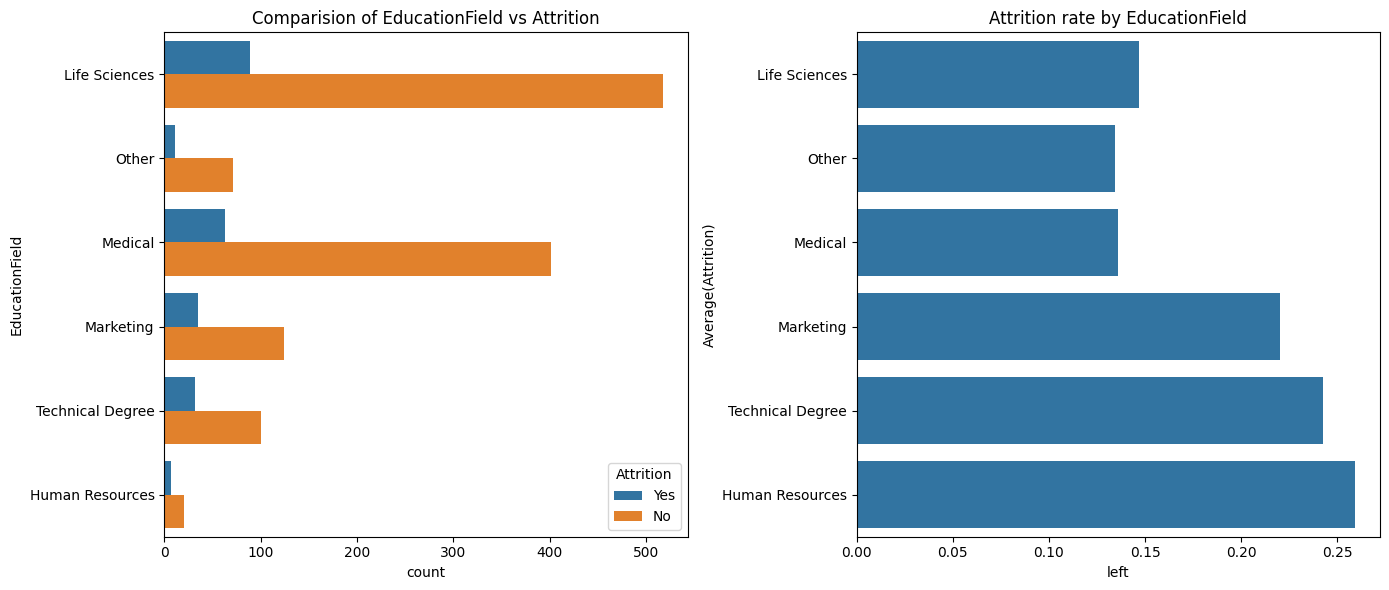

In [ ]:
CategoricalVariables_targetPlots(employee_data,"EducationField",invert_axis=True)

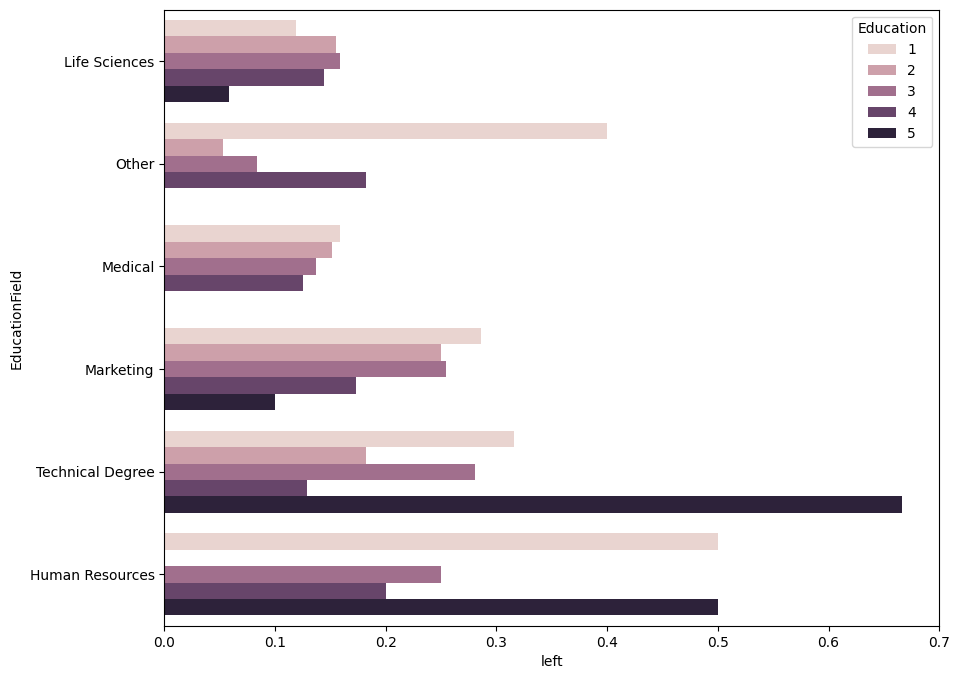

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=employee_data,ci=None)
plt.show()

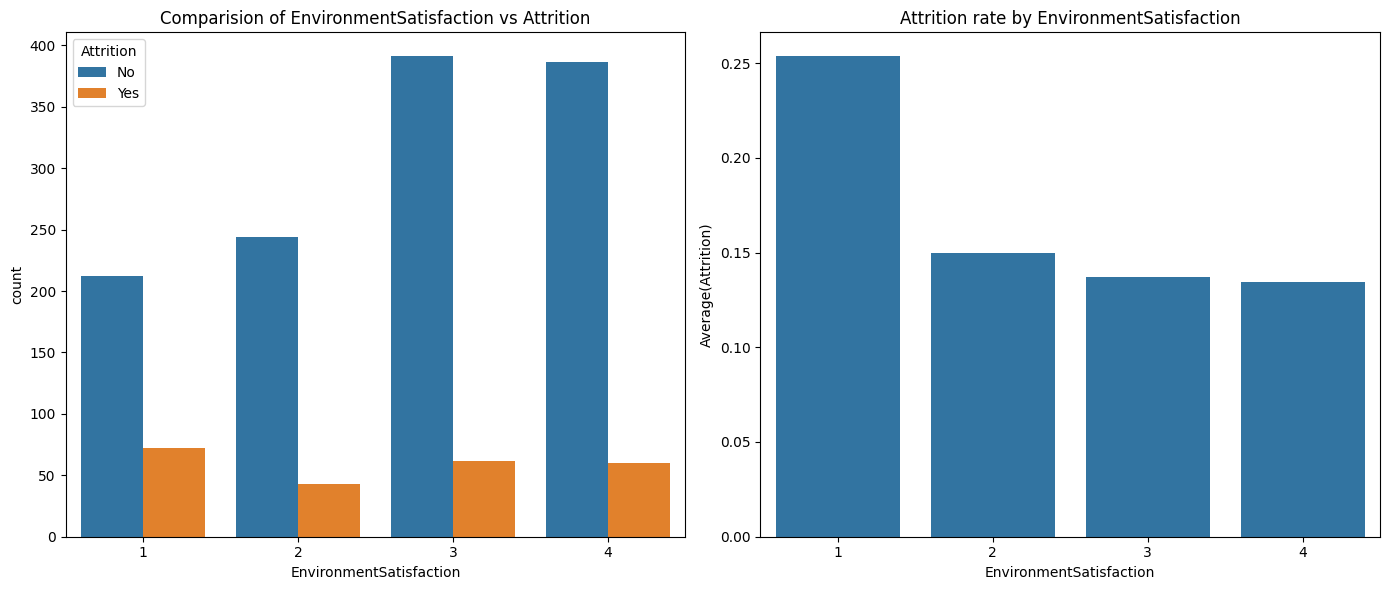

In [ ]:
CategoricalVariables_targetPlots(employee_data,"EnvironmentSatisfaction")

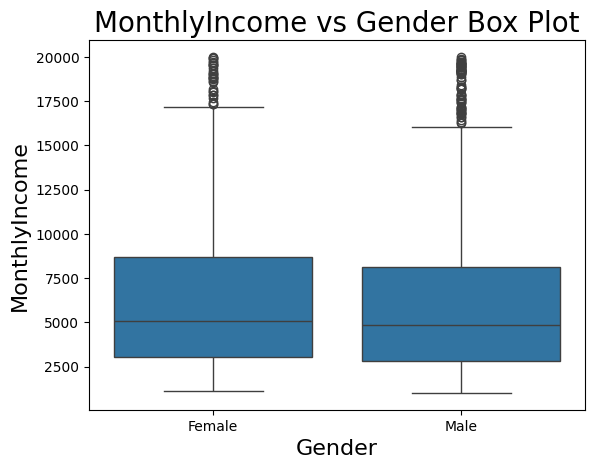

In [ ]:
sns.boxplot(x=employee_data['Gender'], y=employee_data['MonthlyIncome'])
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)
plt.xlabel('Gender', fontsize=16)  # Corrected x-axis label
plt.ylabel('MonthlyIncome', fontsize=16)  # Corrected y-axis label
plt.show()


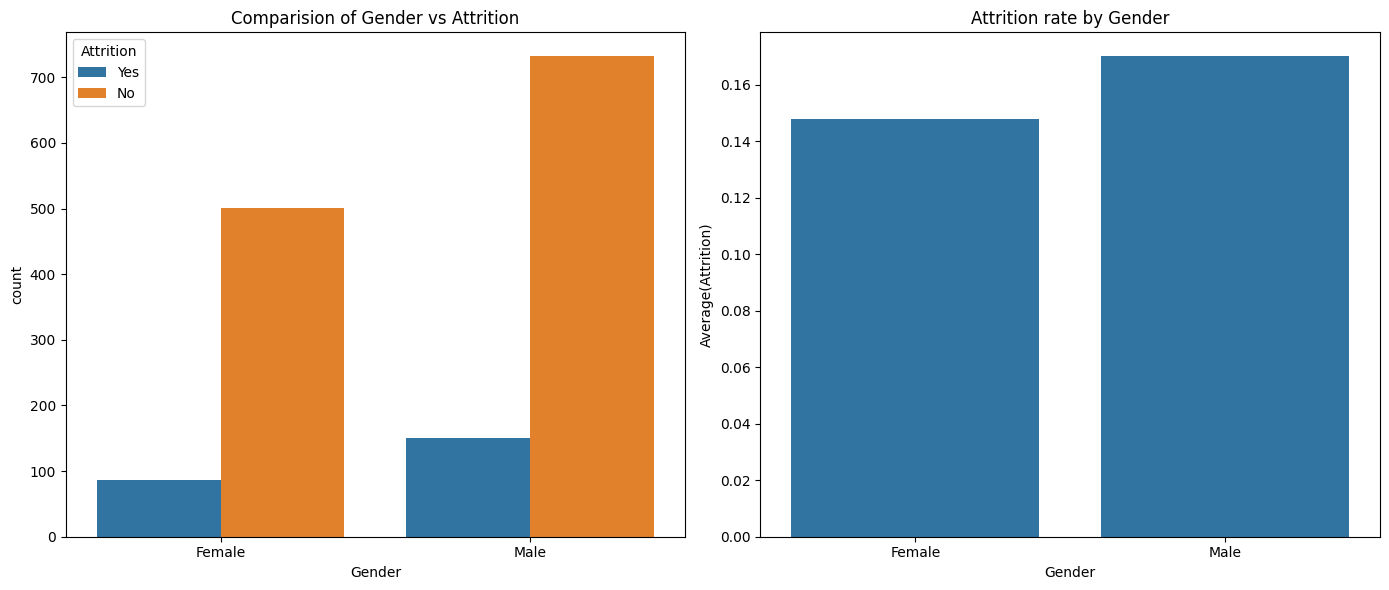

In [ ]:
CategoricalVariables_targetPlots(employee_data,"Gender")

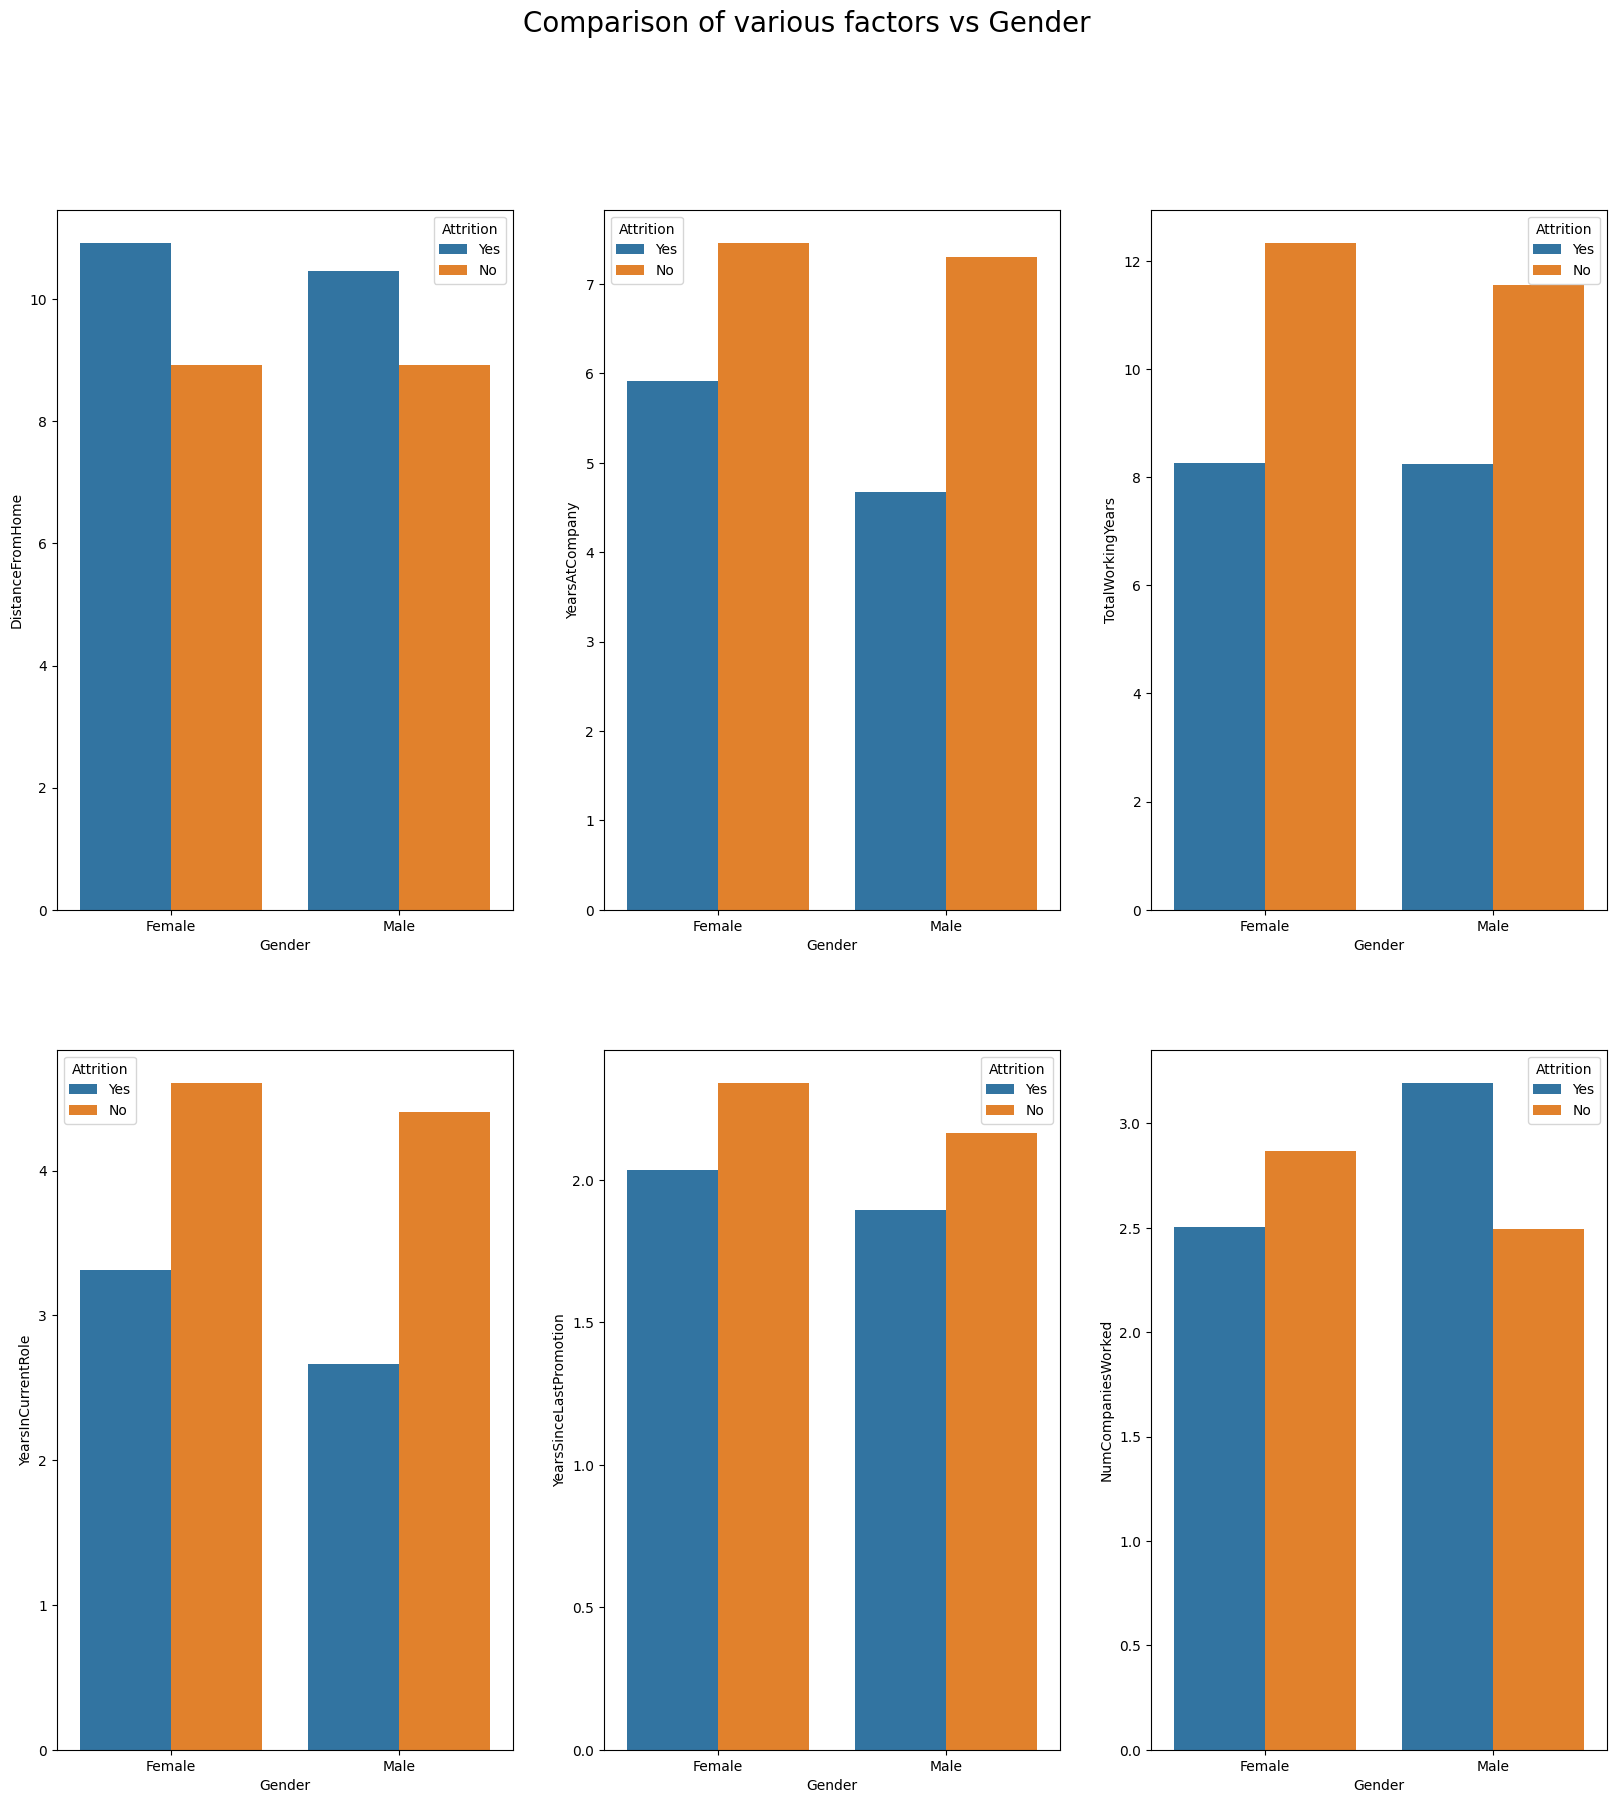

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ig, ax = plt.subplots(2, 3, figsize=(20, 20))  # 'ax' has references to all the four axes
plt.suptitle("Comparison of various factors vs Gender", fontsize=20)

sns.barplot(x='Gender', y='DistanceFromHome', hue='Attrition', data=employee_data, ax=ax[0, 0], ci=None)
sns.barplot(x='Gender', y='YearsAtCompany', hue='Attrition', data=employee_data, ax=ax[0, 1], ci=None)
sns.barplot(x='Gender', y='TotalWorkingYears', hue='Attrition', data=employee_data, ax=ax[0, 2], ci=None)
sns.barplot(x='Gender', y='YearsInCurrentRole', hue='Attrition', data=employee_data, ax=ax[1, 0], ci=None)
sns.barplot(x='Gender', y='YearsSinceLastPromotion', hue='Attrition', data=employee_data, ax=ax[1, 1], ci=None)
sns.barplot(x='Gender', y='NumCompaniesWorked', hue='Attrition', data=employee_data, ax=ax[1, 2], ci=None)

plt.show()


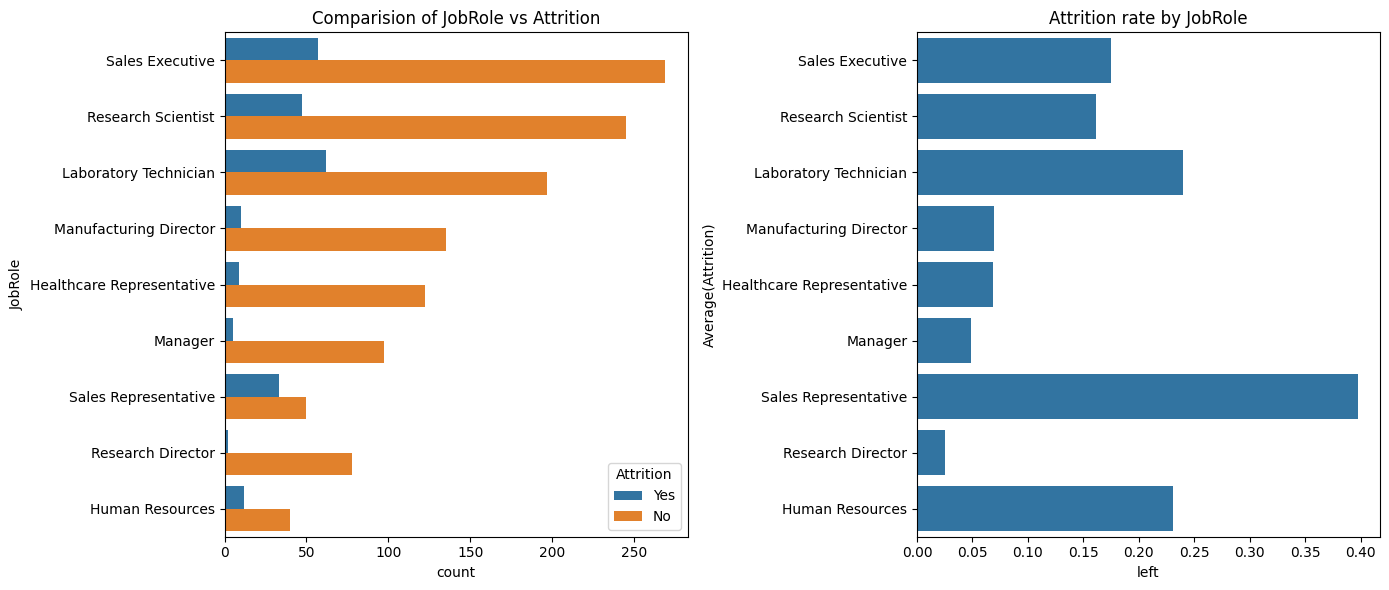

In [ ]:
CategoricalVariables_targetPlots(employee_data,"JobRole",invert_axis=True)

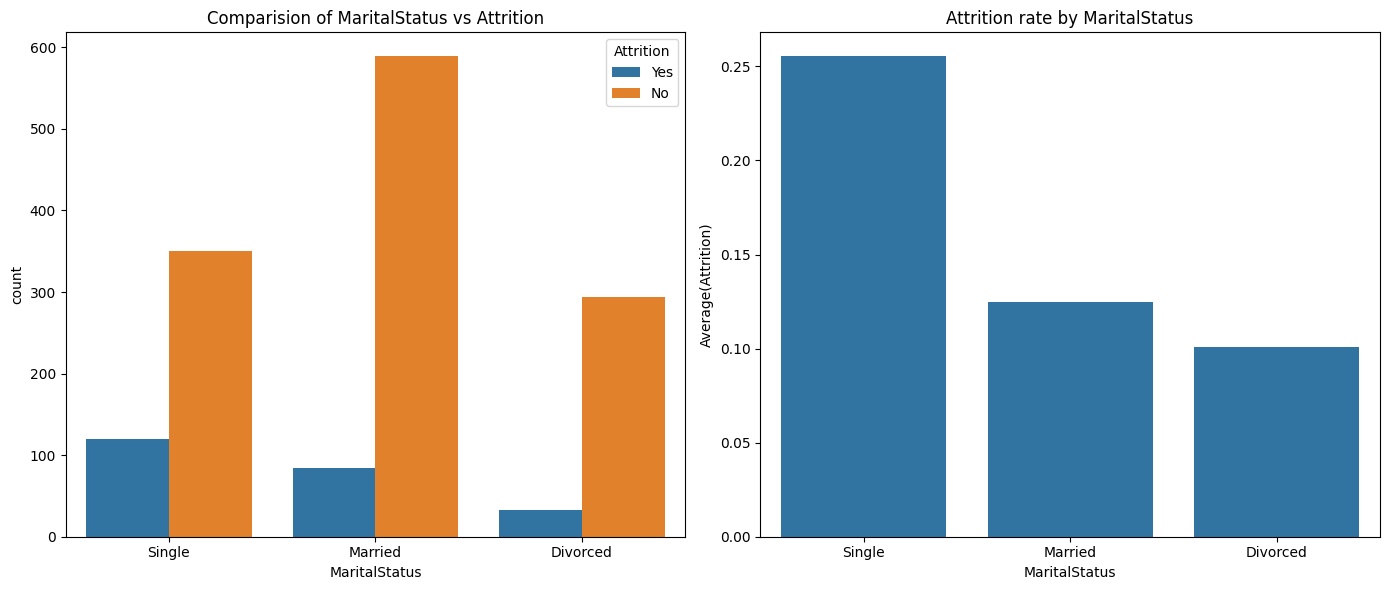

In [ ]:
CategoricalVariables_targetPlots(employee_data,"MaritalStatus")

In [ ]:
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrics
from sklearn import metrics

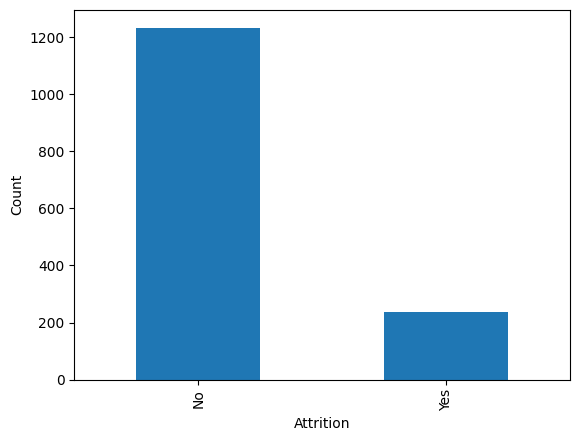

In [ ]:
employee_data.Attrition.value_counts().plot(kind = "bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [ ]:
employee_data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
#copying the main employee data to another dataframe
employee_data_new = employee_data.copy()

In [ ]:
#dropping the not significant variables
employee_data_new.drop(["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours","left"], axis=1,inplace=True)

In [ ]:
#data types of variables
dict(employee_data_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [ ]:
#segregating the variables based on datatypes

numeric_variable_names  = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ["object"]]

In [ ]:
categorical_variable_names

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
#store the numerical variables data in seperate dataset

employee_data_num = employee_data_new[numeric_variable_names]

In [ ]:
#store the categorical variables data in seperate dataset

employee_data_cat = employee_data_new[categorical_variable_names]
#dropping the attrition
employee_data_cat.drop(["Attrition"],axis=1,inplace=True)

In [ ]:
#converting into dummy variables

employee_data_cat = pd.get_dummies(employee_data_cat)

In [ ]:
#Merging the both numerical and categorical data

employee_data_final = pd.concat([employee_data_num, employee_data_cat,employee_data_new[["Attrition"]]],axis=1)

In [ ]:
employee_data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,3,2,4,5993,19479,...,0,0,1,0,0,0,1,0,1,Yes
1,49,279,8,1,3,2,2,2,5130,24907,...,0,1,0,0,0,1,0,1,0,No
2,37,1373,2,2,4,2,1,3,2090,2396,...,0,0,0,0,0,0,1,0,1,Yes
3,33,1392,3,4,4,3,1,3,2909,23159,...,0,1,0,0,0,1,0,0,1,No
4,27,591,2,1,1,3,1,2,3468,16632,...,0,0,0,0,0,1,0,1,0,No


In [ ]:
#final features
features =  list(employee_data_final.columns.difference(["Attrition"]))

In [ ]:
features

['Age',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'DailyRate',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'DistanceFromHome',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime_No',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PerformanceRating',

In [ ]:
#seperating the target and predictors

X = employee_data_final[features]
y = employee_data_final[["Attrition"]]

In [ ]:
X.shape

(1470, 48)

In [ ]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

In [ ]:
#Checks
#Proportion in training data
y_train.Attrition.value_counts()/len(y_train)

No     0.838678
Yes    0.161322
Name: Attrition, dtype: float64

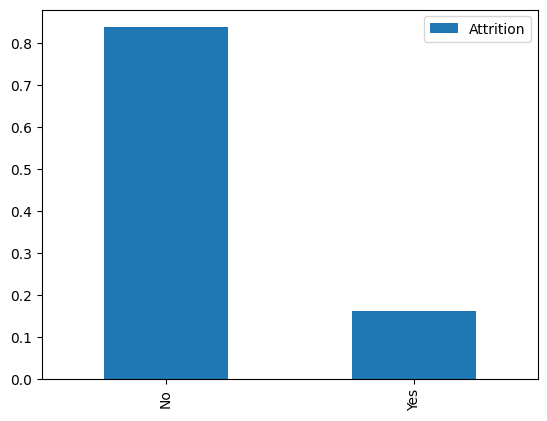

In [ ]:
#Checks
#Proportion in training data
pd.DataFrame(y_train.Attrition.value_counts()/len(y_train)).plot(kind = "bar")
plt.show()

In [ ]:
#Proportion of test data
y_test.Attrition.value_counts()/len(y_test)

No     0.839002
Yes    0.160998
Name: Attrition, dtype: float64

In [ ]:
#make a pipeline for decision tree model

pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

In [ ]:
scores = cross_validate(pipelines['clf'], X_train, y_train,return_train_score=True)

In [ ]:
scores['test_score'].mean()

0.8396590101823348

In [ ]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

In [ ]:
pipelines['clf']

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=100))])

In [ ]:
#Create a cross validation object from decision tree classifier and it's hyperparameters

clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [ ]:
#fit the model with train data
clf_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                                                       15]})

In [ ]:
#Display the best parameters for Decision Tree Model
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__max_features': 7,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 10}

In [ ]:
#Display the best score for the fitted model
clf_model.best_score_

0.8561780724603363

In [ ]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

clf_model.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_split=10,
                       random_state=100)

In [ ]:
#saving into a variable to get graph

clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

In [ ]:
#Making a dataframe of actual and predicted data from test set

tree_test_pred = pd.concat([y_test.reset_index(drop = True),pd.DataFrame(clf_model.predict(X_test))],axis=1)
tree_test_pred.columns = ["actual","predicted"]

#setting the index to original index
tree_test_pred.index = y_test.index

In [ ]:
tree_test_pred.head()

,actual,predicted
34,Yes,Yes
1432,No,No
334,No,No
1068,Yes,No
736,No,No


In [ ]:
#keeping only positive condition (yes for attrition)

pred_probability = pd.DataFrame(p[1] for p in clf_model.predict_proba(X_test))
pred_probability.columns = ["predicted_prob"]
pred_probability.index = y_test.index

In [ ]:
#merging the predicted data and its probability value

tree_test_pred = pd.concat([tree_test_pred,pred_probability],axis=1)

In [ ]:
tree_test_pred.head()

,actual,predicted,predicted_prob
34,Yes,Yes,0.632184
1432,No,No,0.220859
334,No,No,0.072165
1068,Yes,No,0.145985
736,No,No,0.072165


In [ ]:
#converting the labels Yes --> 1 and No --> 0 for further operations below

tree_test_pred["actual_left"] = np.where(tree_test_pred["actual"] == "Yes",1,0)
tree_test_pred["predicted_left"] = np.where(tree_test_pred["predicted"] == "Yes",1,0)

In [ ]:
tree_test_pred.head()

,actual,predicted,predicted_prob,actual_left,predicted_left
34,Yes,Yes,0.632184,1,1
1432,No,No,0.220859,0,0
334,No,No,0.072165,0,0
1068,Yes,No,0.145985,1,0
736,No,No,0.072165,0,0


In [ ]:
#confusion matrix
metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,labels=["Yes","No"])

array([[ 21,  50],
       [ 26, 344]])

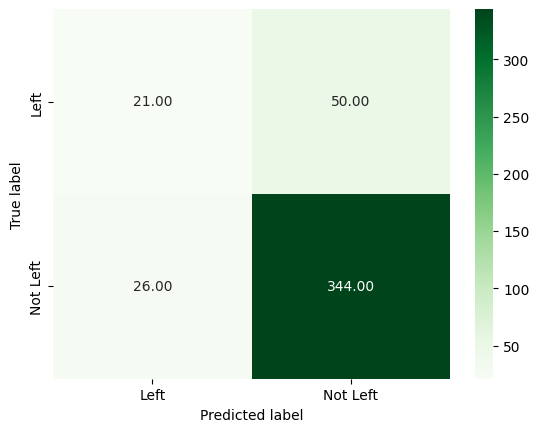

In [ ]:
#confusion matrix visualization using seaborn heatmap

sns.heatmap(metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,
                                    labels=["Yes","No"]),cmap="Greens",annot=True,fmt=".2f",
           xticklabels = ["Left", "Not Left"] , yticklabels = ["Left", "Not Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Area Under ROC Curve

auc_score_test = metrics.roc_auc_score(tree_test_pred.actual_left,tree_test_pred.predicted_left)
print("AUROC Score:",round(auc_score_test,4))

AUROC Score: 0.6128


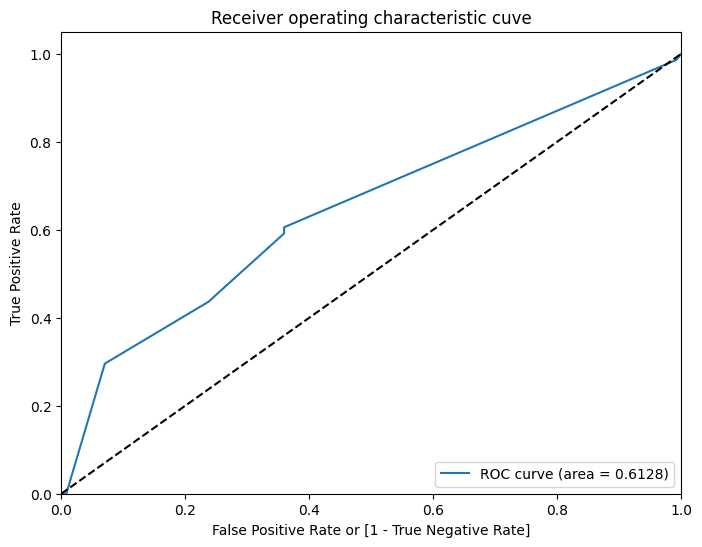

In [ ]:
##Plotting the ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(tree_test_pred.actual_left, tree_test_pred.predicted_prob,drop_intermediate=False)


plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic cuve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#calculating the recall score

print("Recall Score:",round(metrics.recall_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Recall Score: 29.577


In [ ]:
#calculating the precision score

print("Precision Score:",round(metrics.precision_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Precision Score: 44.681


In [ ]:
print(metrics.classification_report(tree_test_pred.actual_left,tree_test_pred.predicted_left))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       370
           1       0.45      0.30      0.36        71

    accuracy                           0.83       441
   macro avg       0.66      0.61      0.63       441
weighted avg       0.80      0.83      0.81       441



In [ ]:
# conda install pydot graphviz
#! pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
import pydotplus as pdot

In [ ]:
from six import StringIO


In [ ]:
from io import StringIO


In [ ]:
!pip install six


In [ ]:

from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus as pdot

In [ ]:
dot_data = StringIO()

In [ ]:
#export the decision tree along with the feature names into a dot file format

export_graphviz(clf_best_model,out_file=dot_data,filled=True,
                rounded=True,special_characters=True,feature_names = X_train.columns.values,class_names = ["No","Yes"])

In [ ]:
#make a graph from dot file
graph = pdot.graph_from_dot_data(dot_data.getvalue())

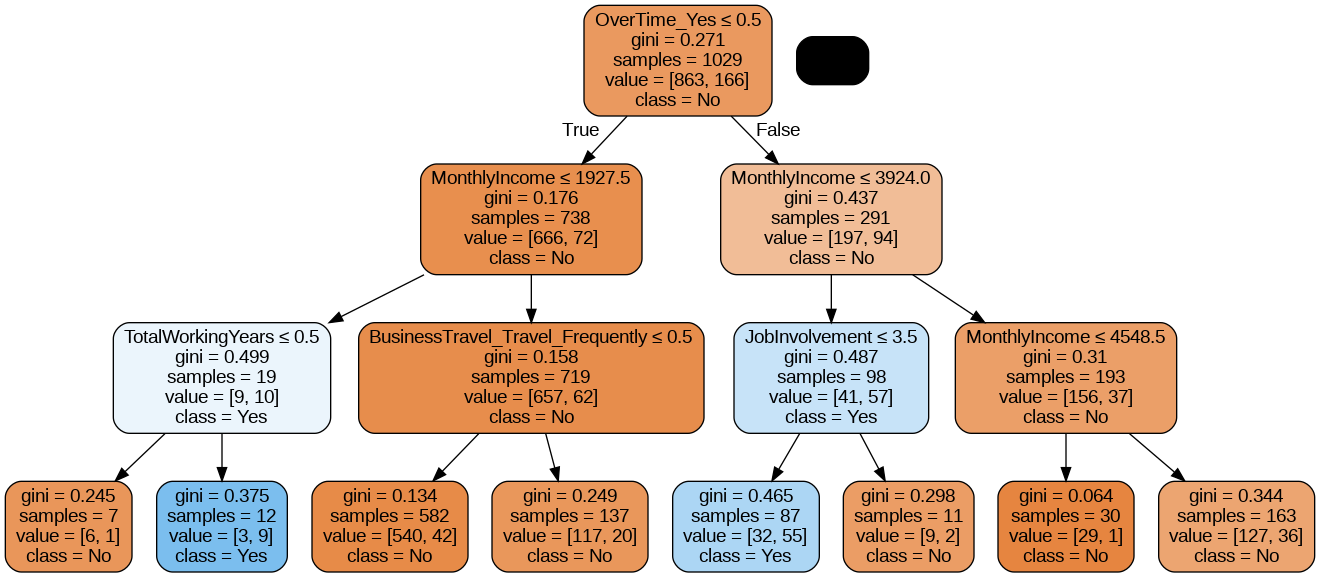

In [ ]:
Image(graph.create_png())

In [ ]:
#export the tree diagram
graph.write_png("employee_attirtion.png")

True